In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

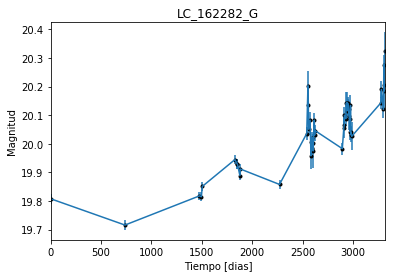

In [2]:
data = np.genfromtxt('LC_162282_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_162282_G')
plt.savefig("LC_162282_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

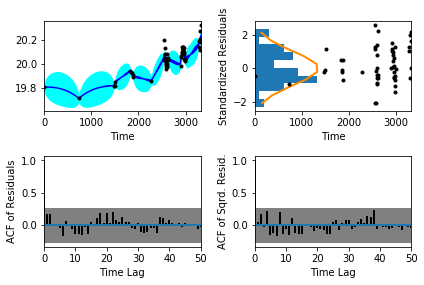

In [5]:
sample.assess_fit()

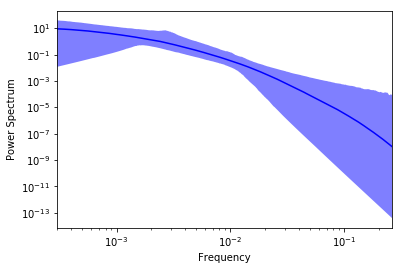

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

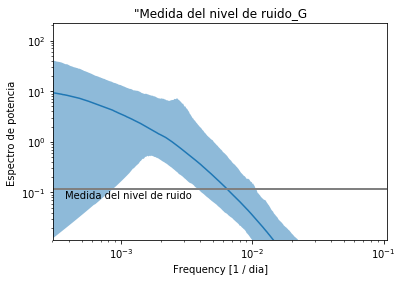

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_162282_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_162282_G')

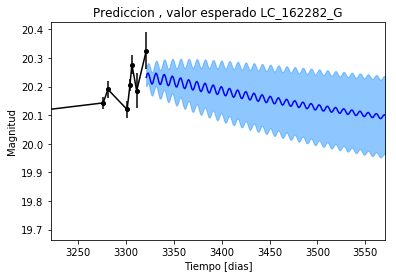

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_162282_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_162282_G')

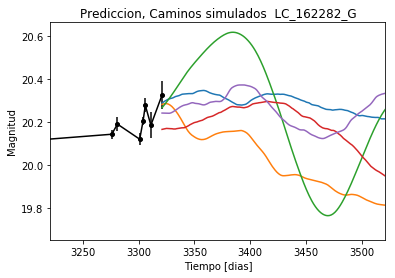

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_162282_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


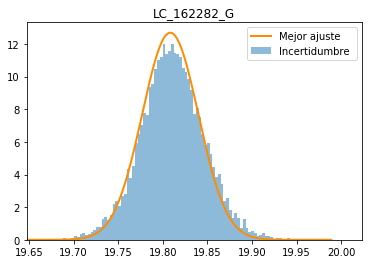

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_162282_G')
plt.savefig("Mejor_ajuste_LC_162282_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_162282_G')

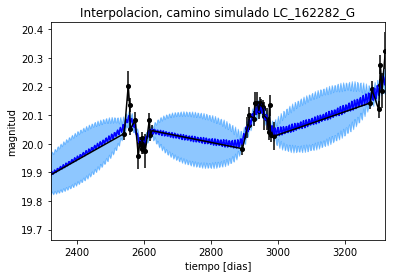

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_162282_G')

Text(0.5,1,'Interpolacion, camino simulado LC_162282_G')

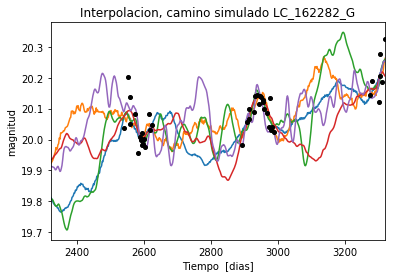

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_162282_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 431.767795984
Median: 0.0167875285261
Standard deviation: 0.111363657094
68% credibility interval: [ 0.00155619  0.14556805]
95% credibility interval: [  4.15321722e-04   4.30224113e-01]
99% credibility interval: [  3.27100496e-04   5.12032746e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1324.34380225
Median: 0.00390291516808
Standard deviation: 0.0591598684886
68% credibility interval: [ 0.0005518   0.03756307]
95% credibility interval: [ 0.00033147  0.20520957]
99% credibility interval: [  3.06323759e-04   4.22729515e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 230.86636997
Median: 0.0257297226045
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2046.86849532
Median: 100.57597302
Standard deviation: 1.76524395179
68% credibility interval: [  98.59255345  101.90347921]
95% credibility interval: [  96.05177858  102.74617748]
99% credibility interval: [  93.83021667  103.2324617 ]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 313.095528388
Median: 0.627928292003
Standard deviation: 1.27189846687
68% credibility interval: [ 0.11109062  2.46470997]
95% credibility interval: [ 0.02497996  4.53590647]
99% credibility interval: [ 0.01351614  5.81031125]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 724.074683265
Median: 0.420069972529
Standard deviation: 2.85200246655
68% credibility interval: [ 0.01339379  3.71226088]
95% credibility interval: [  3.21187469e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 35317.8680792
Median: 6.99888096678e-26
Standard deviation: 5.5074167025e+79
68% credibility interval: [  3.45235776e-63   5.02643266e+16]
95% credibility interval: [  7.01510180e-184   2.58198077e+057]
99% credibility interval: [  1.34559051e-188   4.71195957e+079]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1712.77924627
Median: 19.9313396984
Standard deviation: 0.0750381796268
68% credibility interval: [ 19.86409848  19.99560322]
95% credibility interval: [ 19.77258576  20.07488775]
99% credibility interval: [ 19.68567157  20.14411669]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 3317.81885629
Median: 0.0105662440593
Standard deviation: 0.139494700743
68% credibility interval: [ 0.          0.25297202]
95% credibility interval: [ 0.          0.46502476]
99% credibility interval: [ 0.          0.50931391]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 3317.81885629
Median: 0.0105662440593
Standard deviation: 0.139494700743
68% credibility interval: [ 0.          0.25297202]
95% credibility interval: [ 0.          0.46502476]
99% credibility interval: [ 0.          0.50931391]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 545.565494047
Median: 0.0
Standard deviation: 0.000776548573896
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2046.86849532
Median: 100.57597302
Standard deviation: 1.76524395179
68% credibility interval: [  98.59255345  101.90347921]
95% credibility interval: [  96.05177858  102.74617748]
99% credibility interval: [  93.83021667  103.2324617 ]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2771.77152494
Median: 0.0264834100711
Standard deviation: 0.0216879550287
68% credibility interval: [ 0.01663285  0.04535955]
95% credibility interval: [ 0.01142946  0.08538335]
99% credibility interval: [ 0.0093801   0.13807254]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1458.59471261
Median: 1.18360475281
Standard deviation: 0.200556557997
68% credibility interval: [ 1.00944774  1.3983864 ]
95% credibility interval: [ 0.87628327  1.6614024 ]
99% credibility interval: [ 0.78738054  1.81085452]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 671.42102672
Median: 0.000276953031237
Standard deviation: 0.0241349458468
68% credibility interval: [  1.13301889e-20   5.94380678e-03]
95% credibility interval: [  1.33797399e-61   5.86702007e-02]
99% credibility interval: [  9.99100672e-82   1.38015582e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 431.767795984
Median: (-0.105479152579-1.55462274358j)
Standard deviation: 1.1215201646
68% credibility interval: [-0.91463106+0.j         -0.00977783-0.00805324j]
95% credibility interval: [ -2.70317783e+00+0.j          -2.60954334e-03-0.06323618j]
99% credibility interval: [ -3.21719663e+00-0.60614322j  -2.05523303e-03-0.78583637j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1324.34380225
Median: (-0.0245227392393+0.089678581922j)
Standard deviation: 0.952035518925
68% credibility interval: [-0.23601573+0.73504724j -0.00346709+0.j        ]
95% credibility interval: [-1.28936974+2.76095458j -0.00208267+0.j        ]
99% credibility interval: [ -2.65608788e+00+1.70250899j  -1.92468894e-03+0.j        ]
Posterior summ